In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/Users/luke/Code/ml-projects/ml-from-scratch


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import algorithms.linear_regression.core as core
import algorithms.linear_regression.io as IO
from algorithms.linear_regression.optimization import Hyperparameters, GradientDescent, StochasticGradientDescent

In [5]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [66]:
# Analyze US population data

ds = IO.read_csv("./data/us_population.csv")

In [67]:
ds

array([[1.96000000e+03, 1.80671000e+08],
       [1.96100000e+03, 1.83691000e+08],
       [1.96200000e+03, 1.86538000e+08],
       [1.96300000e+03, 1.89242000e+08],
       [1.96400000e+03, 1.91889000e+08],
       [1.96500000e+03, 1.94303000e+08],
       [1.96600000e+03, 1.96560000e+08],
       [1.96700000e+03, 1.98712000e+08],
       [1.96800000e+03, 2.00706000e+08],
       [1.96900000e+03, 2.02677000e+08],
       [1.97000000e+03, 2.05052000e+08],
       [1.97100000e+03, 2.07661000e+08],
       [1.97200000e+03, 2.09896000e+08],
       [1.97300000e+03, 2.11909000e+08],
       [1.97400000e+03, 2.13854000e+08],
       [1.97500000e+03, 2.15973000e+08],
       [1.97600000e+03, 2.18035000e+08],
       [1.97700000e+03, 2.20239000e+08],
       [1.97800000e+03, 2.22585000e+08],
       [1.97900000e+03, 2.25055000e+08],
       [1.98000000e+03, 2.27225000e+08],
       [1.98100000e+03, 2.29466000e+08],
       [1.98200000e+03, 2.31664000e+08],
       [1.98300000e+03, 2.33792000e+08],
       [1.984000

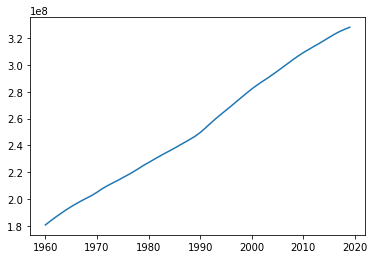

In [68]:
plt.plot(ds[:, 0], ds[:, 1])

In [69]:
normalized_ds = np.column_stack((ds[:, 0] - 1960.0, ds[:, 1] / ds[:, 1].max()))

In [70]:
normalized_ds

array([[ 0.        ,  0.55042427],
       [ 1.        ,  0.55962487],
       [ 2.        ,  0.56829841],
       [ 3.        ,  0.5765363 ],
       [ 4.        ,  0.58460053],
       [ 5.        ,  0.59195492],
       [ 6.        ,  0.59883099],
       [ 7.        ,  0.60538718],
       [ 8.        ,  0.61146201],
       [ 9.        ,  0.61746678],
       [10.        ,  0.62470235],
       [11.        ,  0.63265081],
       [12.        ,  0.63945986],
       [13.        ,  0.64559258],
       [14.        ,  0.65151813],
       [15.        ,  0.65797378],
       [16.        ,  0.66425578],
       [17.        ,  0.67097039],
       [18.        ,  0.67811761],
       [19.        ,  0.6856426 ],
       [20.        ,  0.69225363],
       [21.        ,  0.69908096],
       [22.        ,  0.70577729],
       [23.        ,  0.71226036],
       [24.        ,  0.71845401],
       [25.        ,  0.72484873],
       [26.        ,  0.73157857],
       [27.        ,  0.73814694],
       [28.        ,

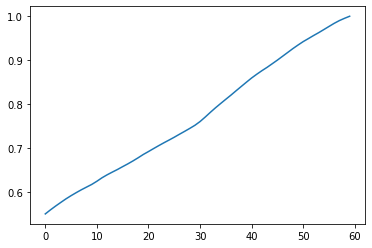

In [71]:
plt.plot(normalized_ds[:, 0], normalized_ds[:, 1])

In [72]:
learning_rate = 0.0005
epochs = 20000
initial_model = core.ModelParameters(m=0.16, b=0)
tolerance = 0.0001
hyperparameters = Hyperparameters(learning_rate, tolerance, epochs, initial_model)
gd = GradientDescent(hyperparameters)
sgd = StochasticGradientDescent(hyperparameters)

In [73]:
gd_solution = gd.solve(normalized_ds)

INFO:root:Training epoch 0...
INFO:root:Loss in current epoch is 22.523401402841035
INFO:root:Training epoch 2000...
INFO:root:Loss in current epoch is 0.02748108809728378
INFO:root:Training epoch 4000...
INFO:root:Loss in current epoch is 0.00990631479175994
INFO:root:Training epoch 6000...
INFO:root:Loss in current epoch is 0.0035985932996669572
INFO:root:Training epoch 8000...
INFO:root:Loss in current epoch is 0.0013347034770138037
INFO:root:Training epoch 10000...
INFO:root:Loss in current epoch is 0.0005221759842357526
INFO:root:Training epoch 12000...
INFO:root:Loss in current epoch is 0.00023055360936840127
INFO:root:Training epoch 14000...
INFO:root:Loss in current epoch is 0.00012588809308841992
INFO:root:Solution found with loss 9.998340519523822e-05


In [74]:
sgd_solution = sgd.solve(normalized_ds)

INFO:root:Training epoch 0...
INFO:root:Loss in current epoch is 0.07904251582622089
INFO:root:Solution found with loss 9.279377121726945e-05


In [75]:
print(gd_solution)
print(sgd_solution)

Solution(model_parameters=ModelParameters(m=0.008105848084828443, b=0.5311206444380767), loss=9.998340519523822e-05)
Solution(model_parameters=ModelParameters(m=0.00799835382368164, b=0.5331751236310834), loss=9.279377121726945e-05)


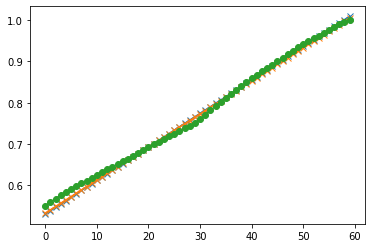

In [76]:
gd_predictions = core.predict(normalized_ds, gd_solution.model_parameters)
sgd_predictions = core.predict(normalized_ds, sgd_solution.model_parameters)
plt.plot(gd_predictions[:, 0], gd_predictions[:, 1], marker='x')
plt.plot(sgd_predictions[:, 0], sgd_predictions[:, 1], marker='x')
plt.plot(normalized_ds[:, 0], normalized_ds[:, 1], marker='o')

In [77]:
scaled_predictions = np.column_stack((gd_predictions[:, 0] + 1960.0, gd_predictions[:, 1] * ds[:, 1].max()))

In [78]:
scaled_predictions

array([[1.96000000e+03, 1.74334787e+08],
       [1.96100000e+03, 1.76995447e+08],
       [1.96200000e+03, 1.79656106e+08],
       [1.96300000e+03, 1.82316766e+08],
       [1.96400000e+03, 1.84977426e+08],
       [1.96500000e+03, 1.87638086e+08],
       [1.96600000e+03, 1.90298745e+08],
       [1.96700000e+03, 1.92959405e+08],
       [1.96800000e+03, 1.95620065e+08],
       [1.96900000e+03, 1.98280724e+08],
       [1.97000000e+03, 2.00941384e+08],
       [1.97100000e+03, 2.03602044e+08],
       [1.97200000e+03, 2.06262703e+08],
       [1.97300000e+03, 2.08923363e+08],
       [1.97400000e+03, 2.11584023e+08],
       [1.97500000e+03, 2.14244683e+08],
       [1.97600000e+03, 2.16905342e+08],
       [1.97700000e+03, 2.19566002e+08],
       [1.97800000e+03, 2.22226662e+08],
       [1.97900000e+03, 2.24887321e+08],
       [1.98000000e+03, 2.27547981e+08],
       [1.98100000e+03, 2.30208641e+08],
       [1.98200000e+03, 2.32869301e+08],
       [1.98300000e+03, 2.35529960e+08],
       [1.984000

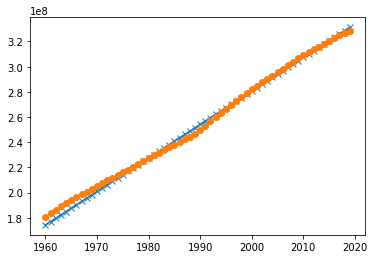

In [79]:
plt.plot(scaled_predictions[:, 0], scaled_predictions[:, 1], marker='x')
plt.plot(ds[:, 0], ds[:, 1], marker='o')

In [80]:
next_year_population = (core.predict(np.array([[61.0]]), gd_solution.model_parameters) * ds[:, 1].max())[:, 1][0]

In [81]:
next_year_population

336635029.22715455

In [82]:
f'{next_year_population:,}'

'336,635,029.22715455'

In [83]:
growth = next_year_population - ds[-1, 1]
f'{growth:,}'

'8,395,506.227154553'

In [84]:
# Analyze world poverty data

ds = IO.read_csv("./data/world_poverty.csv")

In [85]:
ds

array([[1981. ,   42.5],
       [1982. ,   42.1],
       [1983. ,   41.2],
       [1984. ,   39.6],
       [1985. ,   38. ],
       [1986. ,   36.7],
       [1987. ,   35.7],
       [1988. ,   33.6],
       [1989. ,   36.8],
       [1990. ,   36.2],
       [1991. ,   36.1],
       [1992. ,   35.1],
       [1993. ,   34.3],
       [1994. ,   33.2],
       [1995. ,   31.3],
       [1996. ,   29.7],
       [1997. ,   29.6],
       [1998. ,   30. ],
       [1999. ,   28.9],
       [2000. ,   27.7],
       [2001. ,   26.9],
       [2002. ,   25.7],
       [2003. ,   24.7],
       [2004. ,   22.9],
       [2005. ,   20.9],
       [2006. ,   20.3],
       [2007. ,   19.1],
       [2008. ,   18.4],
       [2009. ,   17.6],
       [2010. ,   16. ],
       [2011. ,   13.8],
       [2012. ,   12.9],
       [2013. ,   11.3],
       [2014. ,   10.7],
       [2015. ,   10.1],
       [2016. ,    9.7],
       [2017. ,    9.2]])

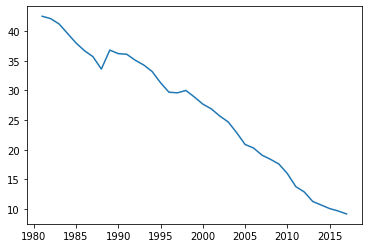

In [86]:
plt.plot(ds[:, 0], ds[:, 1])

In [87]:
normalized_ds = np.column_stack((ds[:, 0] - 1981.0, ds[:, 1] / ds[:, 1].max()))

In [88]:
normalized_ds

array([[ 0.        ,  1.        ],
       [ 1.        ,  0.99058824],
       [ 2.        ,  0.96941176],
       [ 3.        ,  0.93176471],
       [ 4.        ,  0.89411765],
       [ 5.        ,  0.86352941],
       [ 6.        ,  0.84      ],
       [ 7.        ,  0.79058824],
       [ 8.        ,  0.86588235],
       [ 9.        ,  0.85176471],
       [10.        ,  0.84941176],
       [11.        ,  0.82588235],
       [12.        ,  0.80705882],
       [13.        ,  0.78117647],
       [14.        ,  0.73647059],
       [15.        ,  0.69882353],
       [16.        ,  0.69647059],
       [17.        ,  0.70588235],
       [18.        ,  0.68      ],
       [19.        ,  0.65176471],
       [20.        ,  0.63294118],
       [21.        ,  0.60470588],
       [22.        ,  0.58117647],
       [23.        ,  0.53882353],
       [24.        ,  0.49176471],
       [25.        ,  0.47764706],
       [26.        ,  0.44941176],
       [27.        ,  0.43294118],
       [28.        ,

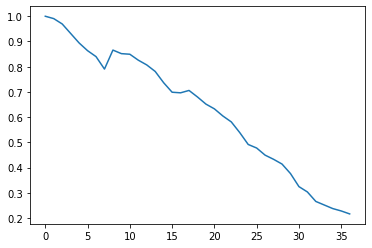

In [89]:
plt.plot(normalized_ds[:, 0], normalized_ds[:, 1])

In [90]:
learning_rate = 0.0003
epochs = 40000
initial_model = core.ModelParameters(m=-0.028, b=1.0)
tolerance = 0.0014
hyperparameters = Hyperparameters(learning_rate, tolerance, epochs, initial_model)
gd = GradientDescent(hyperparameters)
sgd = StochasticGradientDescent(hyperparameters)

In [91]:
gd_solution = gd.solve(normalized_ds)

INFO:root:Training epoch 0...
INFO:root:Loss in current epoch is 0.02267966856822221
INFO:root:Training epoch 4000...
INFO:root:Loss in current epoch is 0.001401365982651938
INFO:root:Solution found with loss 0.001399985473721882


In [92]:
sgd_solution = sgd.solve(normalized_ds)

INFO:root:Training epoch 0...
INFO:root:Loss in current epoch is 0.0017223119977763511
INFO:root:Solution found with loss 0.0013931093919738182


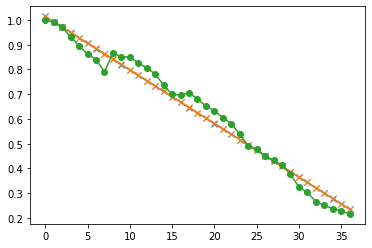

In [93]:
gd_predictions = core.predict(normalized_ds, gd_solution.model_parameters)
sgd_predictions = core.predict(normalized_ds, sgd_solution.model_parameters)
plt.plot(gd_predictions[:, 0], gd_predictions[:, 1], marker='x')
plt.plot(sgd_predictions[:, 0], sgd_predictions[:, 1], marker='x')
plt.plot(normalized_ds[:, 0], normalized_ds[:, 1], marker='o')

In [94]:
scaled_predictions = np.column_stack((gd_predictions[:, 0] + 1981.0, gd_predictions[:, 1] * ds[:, 1].max()))

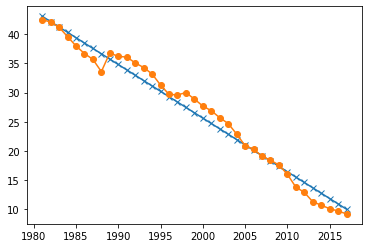

In [95]:
plt.plot(scaled_predictions[:, 0], scaled_predictions[:, 1], marker='x')
plt.plot(ds[:, 0], ds[:, 1], marker='o')